### Import Libraries

In [1]:
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization, concatenate
from keras.layers import Input, Conv2D,MaxPooling2D, AveragePooling2D
import matplotlib.pyplot as plt

2024-04-30 08:53:35.563149: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 08:53:36.047559: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-30 08:53:38.084192: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student/anaconda3/envs/tensorflow/lib
2024-04-30 08:53:38.084328: W tensorflow/co

### Data  Preproccessing

In [2]:
img_height, img_width = 224, 224
batch_size =  64

train_ds = tf.keras.utils.image_dataset_from_directory(
  "Dataset/train",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale',  # Convert images to grayscale
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  "Dataset/val",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale'
) 

Found 8960 files belonging to 5 classes.


2024-04-30 08:53:43.139363: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 08:53:43.210159: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 08:53:43.210230: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-30 08:53:43.214171: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them i

Found 826 files belonging to 5 classes.


In [3]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4']


In [4]:
# Normalize the pixel values to [0, 1]
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

# from tensorflow.keras.layers.experimental.preprocessing import Rescaling
# train_ds = train_ds.map(lambda x, y: (Rescaling(1./255)(x), y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [5]:
for  x,y in train_ds.take(1):
    print(x)

tf.Tensor(
[[[[0.29411766]
   [0.28627452]
   [0.28627452]
   ...
   [0.34117648]
   [0.3372549 ]
   [0.33333334]]

  [[0.2901961 ]
   [0.28627452]
   [0.28627452]
   ...
   [0.34117648]
   [0.33333334]
   [0.33333334]]

  [[0.2901961 ]
   [0.28627452]
   [0.28627452]
   ...
   [0.34117648]
   [0.3372549 ]
   [0.3372549 ]]

  ...

  [[0.12156863]
   [0.12941177]
   [0.14117648]
   ...
   [0.44313726]
   [0.43529412]
   [0.42745098]]

  [[0.12156863]
   [0.12941177]
   [0.13725491]
   ...
   [0.4392157 ]
   [0.43137255]
   [0.42745098]]

  [[0.12156863]
   [0.1254902 ]
   [0.13333334]
   ...
   [0.44313726]
   [0.43529412]
   [0.43137255]]]


 [[[0.5019608 ]
   [0.50980395]
   [0.5137255 ]
   ...
   [0.36078432]
   [0.35686275]
   [0.3372549 ]]

  [[0.49019608]
   [0.5019608 ]
   [0.5019608 ]
   ...
   [0.3647059 ]
   [0.35686275]
   [0.34117648]]

  [[0.48235294]
   [0.49411765]
   [0.5058824 ]
   ...
   [0.34901962]
   [0.34509805]
   [0.3372549 ]]

  ...

  [[0.35686275]
   [0.360784

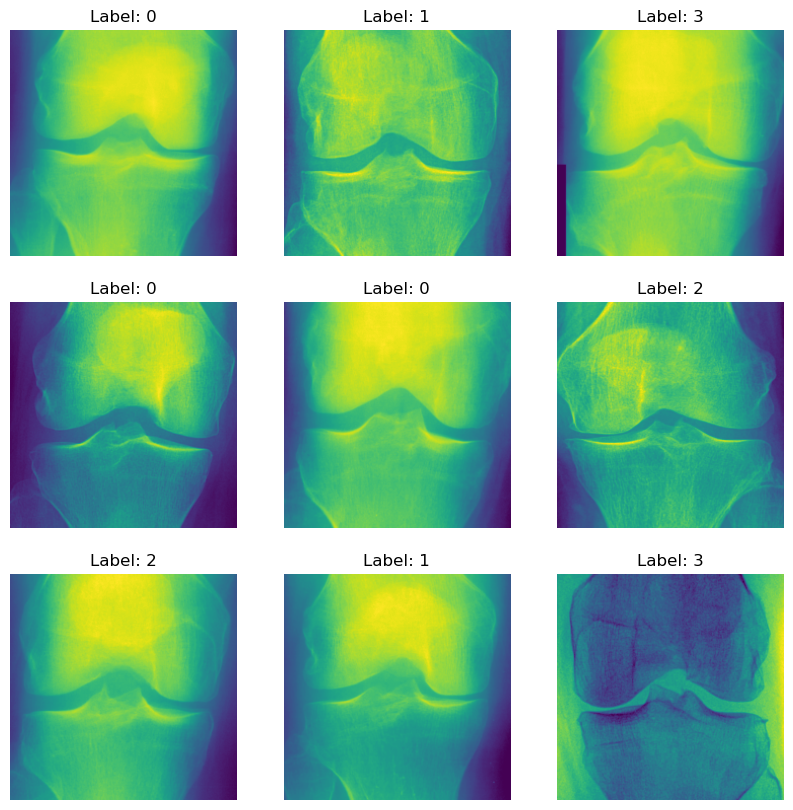

In [6]:
for images, labels in train_ds.take(1):  # Take one batch for visualization
    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Adjust as needed for the number of images to display
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze())  # Visualize grayscale images
        plt.title(f'Label: {labels[i].numpy()}')
        plt.axis('off')
    plt.show()

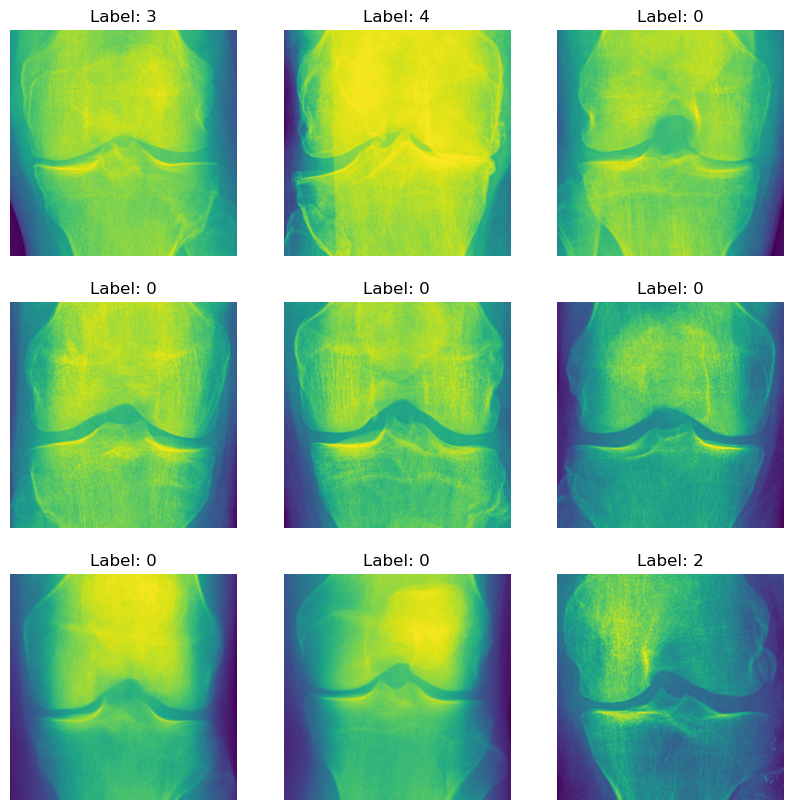

In [7]:
for images, labels in val_ds.take(1):  # Take one batch for visualization
    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Adjust as needed for the number of images to display
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze())  # Visualize grayscale images
        plt.title(f'Label: {labels[i].numpy()}')
        plt.axis('off')
    plt.show()

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 1)
(64,)


In [9]:
for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 1)
(64,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model Building

Model 1  - CNN

In [11]:
model1=Sequential()

model1.add(Conv2D(128,(3,3),input_shape=(224, 224, 1)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64,(3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(32,(3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dropout(0.2))

model1.add(Dense(128,activation='relu'))

model1.add(Dropout(0.1))
model1.add(Dense(64,activation='relu'))

model1.add(Dense(5,activation='softmax')) # Output Layer

# Compile the Model1
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     1280      
                                                                 
 activation (Activation)     (None, 222, 222, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [12]:
history =  model1.fit(train_ds, epochs=100).history

Epoch 1/100


2024-04-30 08:53:53.536444: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-04-30 08:53:56.398197: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-30 08:53:59.828981: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-04-30 08:53:59.878184: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1d6c01d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-30 08:53:59.878320: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-04-30 08:53:59.922550: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-30 08:54:00.340038: I tensor

140/140 [==============================] - 28s 106ms/step - loss: 1.4230 - accuracy: 0.3815
Epoch 2/100
140/140 [==============================] - 15s 105ms/step - loss: 1.4048 - accuracy: 0.3938
Epoch 3/100
140/140 [==============================] - 15s 106ms/step - loss: 1.3958 - accuracy: 0.3939
Epoch 4/100
140/140 [==============================] - 15s 106ms/step - loss: 1.3630 - accuracy: 0.3991
Epoch 5/100
140/140 [==============================] - 15s 106ms/step - loss: 1.3336 - accuracy: 0.4203
Epoch 6/100
140/140 [==============================] - 15s 106ms/step - loss: 1.3135 - accuracy: 0.4222
Epoch 7/100
140/140 [==============================] - 15s 106ms/step - loss: 1.2988 - accuracy: 0.4316
Epoch 8/100
140/140 [==============================] - 15s 106ms/step - loss: 1.2806 - accuracy: 0.4382
Epoch 9/100
140/140 [==============================] - 15s 105ms/step - loss: 1.2607 - accuracy: 0.4504
Epoch 10/100
140/140 [==============================] - 15s 105ms/step - los

140/140 [==============================] - 15s 105ms/step - loss: 0.4013 - accuracy: 0.8422
Epoch 80/100
140/140 [==============================] - 15s 104ms/step - loss: 0.3728 - accuracy: 0.8558
Epoch 81/100
140/140 [==============================] - 15s 105ms/step - loss: 0.3636 - accuracy: 0.8585
Epoch 82/100
140/140 [==============================] - 15s 105ms/step - loss: 0.3707 - accuracy: 0.8567
Epoch 83/100
140/140 [==============================] - 15s 105ms/step - loss: 0.3721 - accuracy: 0.8544
Epoch 84/100
140/140 [==============================] - 15s 105ms/step - loss: 0.3662 - accuracy: 0.8589
Epoch 85/100
140/140 [==============================] - 15s 105ms/step - loss: 0.3642 - accuracy: 0.8618
Epoch 86/100
140/140 [==============================] - 15s 105ms/step - loss: 0.3559 - accuracy: 0.8652
Epoch 87/100
140/140 [==============================] - 15s 105ms/step - loss: 0.3493 - accuracy: 0.8648
Epoch 88/100
140/140 [==============================] - 15s 104ms/st

Model 2 -  ResNet

In [13]:
def resnet_block(inputs, filters, kernel_size, strides=(1, 1), activation='relu'):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = Conv2D(filters, kernel_size=kernel_size, strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    if strides != (1, 1):
        inputs = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(inputs)
    x = keras.layers.add([x, inputs])
    x = Activation(activation)(x)
    return x

def create_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = resnet_block(x, filters=64, kernel_size=(3, 3))
    x = resnet_block(x, filters=64, kernel_size=(3, 3))
    # x = resnet_block(x, filters=64, kernel_size=(3, 3))

    x = resnet_block(x, filters=128, kernel_size=(3, 3), strides=(2, 2))
    x = resnet_block(x, filters=128, kernel_size=(3, 3))
    # x = resnet_block(x, filters=128, kernel_size=(3, 3))
    # x = resnet_block(x, filters=128, kernel_size=(3, 3))

    x = resnet_block(x, filters=256, kernel_size=(3, 3), strides=(2, 2))
    x = resnet_block(x, filters=256, kernel_size=(3, 3))
    x = resnet_block(x, filters=256, kernel_size=(3, 3))
    # x = resnet_block(x, filters=256, kernel_size=(3, 3))
    # x = resnet_block(x, filters=256, kernel_size=(3, 3))
    # x = resnet_block(x, filters=256, kernel_size=(3, 3))

    x = resnet_block(x, filters=512, kernel_size=(3, 3), strides=(2, 2))
    x = resnet_block(x, filters=512, kernel_size=(3, 3))
    # x = resnet_block(x, filters=512, kernel_size=(3, 3))
    x = AveragePooling2D(pool_size=(7, 7))(x)

    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model2 = Model(inputs=inputs, outputs=x)
    return model2

# Define the input shape and number of classes
input_shape = (224, 224, 1)
num_classes = 5

# Create the ResNet model
model2 = create_resnet(input_shape, num_classes)

# Compile the model
# model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Print the model summary
model2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 112, 112, 64  3200        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 112, 112, 64  256        ['conv2d_3[0][0]']               
 alization)                     )                                                             

 conv2d_12 (Conv2D)             (None, 28, 28, 128)  147584      ['activation_13[0][0]']          
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 28, 28, 128)  512        ['conv2d_12[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 activation_14 (Activation)     (None, 28, 28, 128)  0           ['batch_normalization_8[0][0]']  
                                                                                                  
 add_3 (Add)                    (None, 28, 28, 128)  0           ['activation_14[0][0]',          
                                                                  'activation_12[0][0]']          
                                                                                                  
 activatio

 activation_26 (Activation)     (None, 7, 7, 512)    0           ['batch_normalization_16[0][0]'] 
                                                                                                  
 conv2d_22 (Conv2D)             (None, 7, 7, 512)    131584      ['activation_24[0][0]']          
                                                                                                  
 add_7 (Add)                    (None, 7, 7, 512)    0           ['activation_26[0][0]',          
                                                                  'conv2d_22[0][0]']              
                                                                                                  
 activation_27 (Activation)     (None, 7, 7, 512)    0           ['add_7[0][0]']                  
                                                                                                  
 conv2d_23 (Conv2D)             (None, 7, 7, 512)    2359808     ['activation_27[0][0]']          
          

In [14]:
history =  model2.fit(train_ds, epochs=100).history

Epoch 1/100
140/140 [==============================] - 28s 109ms/step - loss: 1.6051 - accuracy: 0.3725
Epoch 2/100
140/140 [==============================] - 15s 109ms/step - loss: 1.4266 - accuracy: 0.3864
Epoch 3/100
140/140 [==============================] - 15s 109ms/step - loss: 1.4014 - accuracy: 0.3968
Epoch 4/100
140/140 [==============================] - 15s 110ms/step - loss: 1.3732 - accuracy: 0.4100
Epoch 5/100
140/140 [==============================] - 15s 108ms/step - loss: 1.2918 - accuracy: 0.4500
Epoch 6/100
140/140 [==============================] - 15s 109ms/step - loss: 1.1743 - accuracy: 0.4965
Epoch 7/100
140/140 [==============================] - 15s 109ms/step - loss: 1.0931 - accuracy: 0.5397
Epoch 8/100
140/140 [==============================] - 15s 108ms/step - loss: 1.0202 - accuracy: 0.5688
Epoch 9/100
140/140 [==============================] - 15s 110ms/step - loss: 0.9563 - accuracy: 0.5930
Epoch 10/100
140/140 [==============================] - 15s 110m

140/140 [==============================] - 15s 108ms/step - loss: 3.7084e-05 - accuracy: 1.0000
Epoch 79/100
140/140 [==============================] - 15s 108ms/step - loss: 3.3628e-05 - accuracy: 1.0000
Epoch 80/100
140/140 [==============================] - 15s 108ms/step - loss: 3.0622e-05 - accuracy: 1.0000
Epoch 81/100
140/140 [==============================] - 15s 109ms/step - loss: 2.7976e-05 - accuracy: 1.0000
Epoch 82/100
140/140 [==============================] - 15s 108ms/step - loss: 2.5630e-05 - accuracy: 1.0000
Epoch 83/100
140/140 [==============================] - 15s 109ms/step - loss: 2.3538e-05 - accuracy: 1.0000
Epoch 84/100
140/140 [==============================] - 15s 109ms/step - loss: 2.1659e-05 - accuracy: 1.0000
Epoch 85/100
140/140 [==============================] - 15s 109ms/step - loss: 1.9965e-05 - accuracy: 1.0000
Epoch 86/100
140/140 [==============================] - 15s 109ms/step - loss: 1.8429e-05 - accuracy: 1.0000
Epoch 87/100
140/140 [==========

Model 3 - CNN

In [15]:
# Define the CNN model
model3 = Sequential()

# Convolutional layer 1
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model3.add(Flatten())

# Fully connected layer
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))

# Output layer
model3.add(Dense(5, activation='softmax'))

# Compile the model
model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Print the model summary
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [16]:
history =  model3.fit(train_ds, epochs=100).history

Epoch 1/100
140/140 [==============================] - 10s 50ms/step - loss: 1.4765 - accuracy: 0.3809
Epoch 2/100
140/140 [==============================] - 7s 51ms/step - loss: 1.4116 - accuracy: 0.3913
Epoch 3/100
140/140 [==============================] - 7s 51ms/step - loss: 1.4012 - accuracy: 0.3952
Epoch 4/100
140/140 [==============================] - 7s 51ms/step - loss: 1.3864 - accuracy: 0.3952
Epoch 5/100
140/140 [==============================] - 7s 50ms/step - loss: 1.3570 - accuracy: 0.4016
Epoch 6/100
140/140 [==============================] - 7s 51ms/step - loss: 1.3307 - accuracy: 0.4189
Epoch 7/100
140/140 [==============================] - 7s 51ms/step - loss: 1.3125 - accuracy: 0.4297
Epoch 8/100
140/140 [==============================] - 7s 51ms/step - loss: 1.2880 - accuracy: 0.4350
Epoch 9/100
140/140 [==============================] - 7s 52ms/step - loss: 1.2752 - accuracy: 0.4436
Epoch 10/100
140/140 [==============================] - 7s 49ms/step - loss: 1.27

140/140 [==============================] - 7s 50ms/step - loss: 0.2010 - accuracy: 0.9194
Epoch 81/100
140/140 [==============================] - 7s 50ms/step - loss: 0.2015 - accuracy: 0.9181
Epoch 82/100
140/140 [==============================] - 7s 50ms/step - loss: 0.1930 - accuracy: 0.9210
Epoch 83/100
140/140 [==============================] - 7s 50ms/step - loss: 0.1924 - accuracy: 0.9199
Epoch 84/100
140/140 [==============================] - 7s 50ms/step - loss: 0.1905 - accuracy: 0.9240
Epoch 85/100
140/140 [==============================] - 7s 50ms/step - loss: 0.2145 - accuracy: 0.9124
Epoch 86/100
140/140 [==============================] - 7s 50ms/step - loss: 0.1884 - accuracy: 0.9278
Epoch 87/100
140/140 [==============================] - 7s 50ms/step - loss: 0.1819 - accuracy: 0.9276
Epoch 88/100
140/140 [==============================] - 7s 48ms/step - loss: 0.1769 - accuracy: 0.9276
Epoch 89/100
140/140 [==============================] - 7s 50ms/step - loss: 0.1752 - 